### Correlate P time series for each pair of gauges:
### Fisera Ridge, Upper Clearing, Hay Meadow, Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' this removes the warning when renaming columns
import math
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy
# import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Read in daily precip data for all stations, remove P<1mm and group by month

### Fisera Ridge 2325 m

In [2]:
FRPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_daily_p_mm"])
# change date column to datetime format
FRPdaily_df['date'] =  pd.to_datetime(FRPdaily_df['date'], format='%Y-%m-%d')
# set date index
FRPdaily_df.set_index("date", inplace=True)
# FRPdaily_df

### Group by month (Oct to Sep)

In [3]:
FRPoct_df = FRPdaily_df[FRPdaily_df.index.month == 10]
FRPoct_df.rename(columns={'FR_daily_p_mm': 'FR_dailyoct_p_mm'}, inplace=True)
FRPnov_df = FRPdaily_df[FRPdaily_df.index.month == 11]
FRPnov_df.rename(columns={'FR_daily_p_mm': 'FR_dailynov_p_mm'}, inplace=True)
FRPdec_df = FRPdaily_df[FRPdaily_df.index.month == 12]
FRPdec_df.rename(columns={'FR_daily_p_mm': 'FR_dailydec_p_mm'}, inplace=True)
FRPjan_df = FRPdaily_df[FRPdaily_df.index.month == 1]
FRPjan_df.rename(columns={'FR_daily_p_mm': 'FR_dailyjan_p_mm'}, inplace=True)
FRPfeb_df = FRPdaily_df[FRPdaily_df.index.month == 2]
FRPfeb_df.rename(columns={'FR_daily_p_mm': 'FR_dailyfeb_p_mm'}, inplace=True)
FRPmar_df = FRPdaily_df[FRPdaily_df.index.month == 3]
FRPmar_df.rename(columns={'FR_daily_p_mm': 'FR_dailymar_p_mm'}, inplace=True)
FRPapr_df = FRPdaily_df[FRPdaily_df.index.month == 4]
FRPapr_df.rename(columns={'FR_daily_p_mm': 'FR_dailyapr_p_mm'}, inplace=True)
FRPmay_df = FRPdaily_df[FRPdaily_df.index.month == 5]
FRPmay_df.rename(columns={'FR_daily_p_mm': 'FR_dailymay_p_mm'}, inplace=True)
FRPjun_df = FRPdaily_df[FRPdaily_df.index.month == 6]
FRPjun_df.rename(columns={'FR_daily_p_mm': 'FR_dailyjun_p_mm'}, inplace=True)
FRPjul_df = FRPdaily_df[FRPdaily_df.index.month == 7]
FRPjul_df.rename(columns={'FR_daily_p_mm': 'FR_dailyjul_p_mm'}, inplace=True)
FRPaug_df = FRPdaily_df[FRPdaily_df.index.month == 8]
FRPaug_df.rename(columns={'FR_daily_p_mm': 'FR_dailyaug_p_mm'}, inplace=True)
FRPsep_df = FRPdaily_df[FRPdaily_df.index.month == 9]
FRPsep_df.rename(columns={'FR_daily_p_mm': 'FR_dailysep_p_mm'}, inplace=True)
# FRPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [4]:
FRPdjf_df = pd.concat([FRPdec_df, FRPjan_df, FRPfeb_df], axis=1, join="outer")
FRPdjf_df['FR_winter_p_mm'] = FRPdjf_df.sum(axis=1)
FRPmam_df = pd.concat([FRPmar_df, FRPapr_df, FRPmay_df], axis=1, join="outer")
FRPmam_df['FR_spring_p_mm'] = FRPmam_df.sum(axis=1)
FRPjja_df = pd.concat([FRPjun_df, FRPjul_df, FRPaug_df], axis=1, join="outer")
FRPjja_df['FR_summer_p_mm'] = FRPjja_df.sum(axis=1)
FRPson_df = pd.concat([FRPsep_df, FRPoct_df, FRPnov_df], axis=1, join="outer")
FRPson_df['FR_autumn_p_mm'] = FRPson_df.sum(axis=1)
# FRPdjf_df

### Upper Clearing 1845 m

In [5]:
UCPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_daily_p_mm"])
# change date column to datetime format
UCPdaily_df['date'] =  pd.to_datetime(UCPdaily_df['date'], format='%Y-%m-%d')
# set date index
UCPdaily_df.set_index("date", inplace=True)
# UCPdaily_df

### Group by month (Oct to Sep)

In [6]:
UCPoct_df = UCPdaily_df[UCPdaily_df.index.month == 10]
UCPoct_df.rename(columns={'UC_daily_p_mm': 'UC_dailyoct_p_mm'}, inplace=True)
UCPnov_df = UCPdaily_df[UCPdaily_df.index.month == 11]
UCPnov_df.rename(columns={'UC_daily_p_mm': 'UC_dailynov_p_mm'}, inplace=True)
UCPdec_df = UCPdaily_df[UCPdaily_df.index.month == 12]
UCPdec_df.rename(columns={'UC_daily_p_mm': 'UC_dailydec_p_mm'}, inplace=True)
UCPjan_df = UCPdaily_df[UCPdaily_df.index.month == 1]
UCPjan_df.rename(columns={'UC_daily_p_mm': 'UC_dailyjan_p_mm'}, inplace=True)
UCPfeb_df = UCPdaily_df[UCPdaily_df.index.month == 2]
UCPfeb_df.rename(columns={'UC_daily_p_mm': 'UC_dailyfeb_p_mm'}, inplace=True)
UCPmar_df = UCPdaily_df[UCPdaily_df.index.month == 3]
UCPmar_df.rename(columns={'UC_daily_p_mm': 'UC_dailymar_p_mm'}, inplace=True)
UCPapr_df = UCPdaily_df[UCPdaily_df.index.month == 4]
UCPapr_df.rename(columns={'UC_daily_p_mm': 'UC_dailyapr_p_mm'}, inplace=True)
UCPmay_df = UCPdaily_df[UCPdaily_df.index.month == 5]
UCPmay_df.rename(columns={'UC_daily_p_mm': 'UC_dailymay_p_mm'}, inplace=True)
UCPjun_df = UCPdaily_df[UCPdaily_df.index.month == 6]
UCPjun_df.rename(columns={'UC_daily_p_mm': 'UC_dailyjun_p_mm'}, inplace=True)
UCPjul_df = UCPdaily_df[UCPdaily_df.index.month == 7]
UCPjul_df.rename(columns={'UC_daily_p_mm': 'UC_dailyjul_p_mm'}, inplace=True)
UCPaug_df = UCPdaily_df[UCPdaily_df.index.month == 8]
UCPaug_df.rename(columns={'UC_daily_p_mm': 'UC_dailyaug_p_mm'}, inplace=True)
UCPsep_df = UCPdaily_df[UCPdaily_df.index.month == 9]
UCPsep_df.rename(columns={'UC_daily_p_mm': 'UC_dailysep_p_mm'}, inplace=True)
# UCPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [7]:
UCPdjf_df = pd.concat([UCPdec_df, UCPjan_df, UCPfeb_df], axis=1, join="outer")
UCPdjf_df['UC_winter_p_mm'] = UCPdjf_df.sum(axis=1)
UCPmam_df = pd.concat([UCPmar_df, UCPapr_df, UCPmay_df], axis=1, join="outer")
UCPmam_df['UC_spring_p_mm'] = UCPmam_df.sum(axis=1)
UCPjja_df = pd.concat([UCPjun_df, UCPjul_df, UCPaug_df], axis=1, join="outer")
UCPjja_df['UC_summer_p_mm'] = UCPjja_df.sum(axis=1)
UCPson_df = pd.concat([UCPsep_df, UCPoct_df, UCPnov_df], axis=1, join="outer")
UCPson_df['UC_autumn_p_mm'] = UCPson_df.sum(axis=1)
# UCPdjf_df

### Hay Meadow 1436 m

In [8]:
HMPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_daily_p_mm"])
# change date column from object to datetime format
HMPdaily_df['date'] =  pd.to_datetime(HMPdaily_df['date'], format='%Y-%m-%d')
# set date index
HMPdaily_df.set_index("date", inplace=True)
# HMPdaily_df

### Group by month (Oct to Sep)

In [9]:
HMPoct_df = HMPdaily_df[HMPdaily_df.index.month == 10]
HMPoct_df.rename(columns={'HM_daily_p_mm': 'HM_dailyoct_p_mm'}, inplace=True)
HMPnov_df = HMPdaily_df[HMPdaily_df.index.month == 11]
HMPnov_df.rename(columns={'HM_daily_p_mm': 'HM_dailynov_p_mm'}, inplace=True)
HMPdec_df = HMPdaily_df[HMPdaily_df.index.month == 12]
HMPdec_df.rename(columns={'HM_daily_p_mm': 'HM_dailydec_p_mm'}, inplace=True)
HMPjan_df = HMPdaily_df[HMPdaily_df.index.month == 1]
HMPjan_df.rename(columns={'HM_daily_p_mm': 'HM_dailyjan_p_mm'}, inplace=True)
HMPfeb_df = HMPdaily_df[HMPdaily_df.index.month == 2]
HMPfeb_df.rename(columns={'HM_daily_p_mm': 'HM_dailyfeb_p_mm'}, inplace=True)
HMPmar_df = HMPdaily_df[HMPdaily_df.index.month == 3]
HMPmar_df.rename(columns={'HM_daily_p_mm': 'HM_dailymar_p_mm'}, inplace=True)
HMPapr_df = HMPdaily_df[HMPdaily_df.index.month == 4]
HMPapr_df.rename(columns={'HM_daily_p_mm': 'HM_dailyapr_p_mm'}, inplace=True)
HMPmay_df = HMPdaily_df[HMPdaily_df.index.month == 5]
HMPmay_df.rename(columns={'HM_daily_p_mm': 'HM_dailymay_p_mm'}, inplace=True)
HMPjun_df = HMPdaily_df[HMPdaily_df.index.month == 6]
HMPjun_df.rename(columns={'HM_daily_p_mm': 'HM_dailyjun_p_mm'}, inplace=True)
HMPjul_df = HMPdaily_df[HMPdaily_df.index.month == 7]
HMPjul_df.rename(columns={'HM_daily_p_mm': 'HM_dailyjul_p_mm'}, inplace=True)
HMPaug_df = HMPdaily_df[HMPdaily_df.index.month == 8]
HMPaug_df.rename(columns={'HM_daily_p_mm': 'HM_dailyaug_p_mm'}, inplace=True)
HMPsep_df = HMPdaily_df[HMPdaily_df.index.month == 9]
HMPsep_df.rename(columns={'HM_daily_p_mm': 'HM_dailysep_p_mm'}, inplace=True)
# HMPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [10]:
HMPdjf_df = pd.concat([HMPdec_df, HMPjan_df, HMPfeb_df], axis=1, join="outer")
HMPdjf_df['HM_winter_p_mm'] = HMPdjf_df.sum(axis=1)
HMPmam_df = pd.concat([HMPmar_df, HMPapr_df, HMPmay_df], axis=1, join="outer")
HMPmam_df['HM_spring_p_mm'] = HMPmam_df.sum(axis=1)
HMPjja_df = pd.concat([HMPjun_df, HMPjul_df, HMPaug_df], axis=1, join="outer")
HMPjja_df['HM_summer_p_mm'] = HMPjja_df.sum(axis=1)
HMPson_df = pd.concat([HMPsep_df, HMPoct_df, HMPnov_df], axis=1, join="outer")
HMPson_df['HM_autumn_p_mm'] = HMPson_df.sum(axis=1)
# HMPdjf_df

### Kananaskis 1391.1 m (14 NaNs in raw daily data)

In [11]:
KPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
KPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
KPdaily_df['date'] =  pd.to_datetime(KPdaily_df['date'], format = '%d/%m/%Y')
# set date index
KPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
KPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPdaily_df.drop(KPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPdaily_df.drop(KPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# KPdaily_df

### Group by month (Oct to Sep)

In [12]:
KPoct_df = KPdaily_df[KPdaily_df.index.month == 10]
KPoct_df.rename(columns={'K_daily_p_mm': 'K_dailyoct_p_mm'}, inplace=True)
KPnov_df = KPdaily_df[KPdaily_df.index.month == 11]
KPnov_df.rename(columns={'K_daily_p_mm': 'K_dailynov_p_mm'}, inplace=True)
KPdec_df = KPdaily_df[KPdaily_df.index.month == 12]
KPdec_df.rename(columns={'K_daily_p_mm': 'K_dailydec_p_mm'}, inplace=True)
KPjan_df = KPdaily_df[KPdaily_df.index.month == 1]
KPjan_df.rename(columns={'K_daily_p_mm': 'K_dailyjan_p_mm'}, inplace=True)
KPfeb_df = KPdaily_df[KPdaily_df.index.month == 2]
KPfeb_df.rename(columns={'K_daily_p_mm': 'K_dailyfeb_p_mm'}, inplace=True)
KPmar_df = KPdaily_df[KPdaily_df.index.month == 3]
KPmar_df.rename(columns={'K_daily_p_mm': 'K_dailymar_p_mm'}, inplace=True)
KPapr_df = KPdaily_df[KPdaily_df.index.month == 4]
KPapr_df.rename(columns={'K_daily_p_mm': 'K_dailyapr_p_mm'}, inplace=True)
KPmay_df = KPdaily_df[KPdaily_df.index.month == 5]
KPmay_df.rename(columns={'K_daily_p_mm': 'K_dailymay_p_mm'}, inplace=True)
KPjun_df = KPdaily_df[KPdaily_df.index.month == 6]
KPjun_df.rename(columns={'K_daily_p_mm': 'K_dailyjun_p_mm'}, inplace=True)
KPjul_df = KPdaily_df[KPdaily_df.index.month == 7]
KPjul_df.rename(columns={'K_daily_p_mm': 'K_dailyjul_p_mm'}, inplace=True)
KPaug_df = KPdaily_df[KPdaily_df.index.month == 8]
KPaug_df.rename(columns={'K_daily_p_mm': 'K_dailyaug_p_mm'}, inplace=True)
KPsep_df = KPdaily_df[KPdaily_df.index.month == 9]
KPsep_df.rename(columns={'K_daily_p_mm': 'K_dailysep_p_mm'}, inplace=True)
# KPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [13]:
KPdjf_df = pd.concat([KPdec_df, KPjan_df, KPfeb_df], axis=1, join="outer")
KPdjf_df['K_winter_p_mm'] = KPdjf_df.sum(axis=1)
KPmam_df = pd.concat([KPmar_df, KPapr_df, KPmay_df], axis=1, join="outer")
KPmam_df['K_spring_p_mm'] = KPmam_df.sum(axis=1)
KPjja_df = pd.concat([KPjun_df, KPjul_df, KPaug_df], axis=1, join="outer")
KPjja_df['K_summer_p_mm'] = KPjja_df.sum(axis=1)
KPson_df = pd.concat([KPsep_df, KPoct_df, KPnov_df], axis=1, join="outer")
KPson_df['K_autumn_p_mm'] = KPson_df.sum(axis=1)
# KPdjf_df

### Bow Valley 1297.5 m (173 NaNs in raw daily data)

In [14]:
BVPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
BVPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
BVPdaily_df['date'] =  pd.to_datetime(BVPdaily_df['date'], format = '%d/%m/%Y')
# set date index
BVPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
BVPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BVPdaily_df.drop(BVPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BVPdaily_df.drop(BVPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# BVPdaily_df

### Group by month (Oct to Sep)

In [15]:
BVPoct_df = BVPdaily_df[BVPdaily_df.index.month == 10]
BVPoct_df.rename(columns={'BV_daily_p_mm': 'BV_dailyoct_p_mm'}, inplace=True)
BVPnov_df = BVPdaily_df[BVPdaily_df.index.month == 11]
BVPnov_df.rename(columns={'BV_daily_p_mm': 'BV_dailynov_p_mm'}, inplace=True)
BVPdec_df = BVPdaily_df[BVPdaily_df.index.month == 12]
BVPdec_df.rename(columns={'BV_daily_p_mm': 'BV_dailydec_p_mm'}, inplace=True)
BVPjan_df = BVPdaily_df[BVPdaily_df.index.month == 1]
BVPjan_df.rename(columns={'BV_daily_p_mm': 'BV_dailyjan_p_mm'}, inplace=True)
BVPfeb_df = BVPdaily_df[BVPdaily_df.index.month == 2]
BVPfeb_df.rename(columns={'BV_daily_p_mm': 'BV_dailyfeb_p_mm'}, inplace=True)
BVPmar_df = BVPdaily_df[BVPdaily_df.index.month == 3]
BVPmar_df.rename(columns={'BV_daily_p_mm': 'BV_dailymar_p_mm'}, inplace=True)
BVPapr_df = BVPdaily_df[BVPdaily_df.index.month == 4]
BVPapr_df.rename(columns={'BV_daily_p_mm': 'BV_dailyapr_p_mm'}, inplace=True)
BVPmay_df = BVPdaily_df[BVPdaily_df.index.month == 5]
BVPmay_df.rename(columns={'BV_daily_p_mm': 'BV_dailymay_p_mm'}, inplace=True)
BVPjun_df = BVPdaily_df[BVPdaily_df.index.month == 6]
BVPjun_df.rename(columns={'BV_daily_p_mm': 'BV_dailyjun_p_mm'}, inplace=True)
BVPjul_df = BVPdaily_df[BVPdaily_df.index.month == 7]
BVPjul_df.rename(columns={'BV_daily_p_mm': 'BV_dailyjul_p_mm'}, inplace=True)
BVPaug_df = BVPdaily_df[BVPdaily_df.index.month == 8]
BVPaug_df.rename(columns={'BV_daily_p_mm': 'BV_dailyaug_p_mm'}, inplace=True)
BVPsep_df = BVPdaily_df[BVPdaily_df.index.month == 9]
BVPsep_df.rename(columns={'BV_daily_p_mm': 'BV_dailysep_p_mm'}, inplace=True)
# BVPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [16]:
BVPdjf_df = pd.concat([BVPdec_df, BVPjan_df, BVPfeb_df], axis=1, join="outer")
BVPdjf_df['BV_winter_p_mm'] = BVPdjf_df.sum(axis=1)
BVPmam_df = pd.concat([BVPmar_df, BVPapr_df, BVPmay_df], axis=1, join="outer")
BVPmam_df['BV_spring_p_mm'] = BVPmam_df.sum(axis=1)
BVPjja_df = pd.concat([BVPjun_df, BVPjul_df, BVPaug_df], axis=1, join="outer")
BVPjja_df['BV_summer_p_mm'] = BVPjja_df.sum(axis=1)
BVPson_df = pd.concat([BVPsep_df, BVPoct_df, BVPnov_df], axis=1, join="outer")
BVPson_df['BV_autumn_p_mm'] = BVPson_df.sum(axis=1)
# BVPdjf_df

### Kananaskis Pocaterra 1610.0 m (1734 NaNs in raw daily data!!!!!!)

In [17]:
KPPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
KPPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
KPPdaily_df['date'] =  pd.to_datetime(KPPdaily_df['date'], format = '%d/%m/%Y')
# set date index
KPPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
KPPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
KPPdaily_df.drop(KPPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# need to drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
KPPdaily_df.drop(KPPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# KPPdaily_df

### Group by month (Oct to Sep)

In [18]:
KPPoct_df = KPPdaily_df[KPPdaily_df.index.month == 10]
KPPoct_df.rename(columns={'KP_daily_p_mm': 'KP_dailyoct_p_mm'}, inplace=True)
KPPnov_df = KPPdaily_df[KPPdaily_df.index.month == 11]
KPPnov_df.rename(columns={'KP_daily_p_mm': 'KP_dailynov_p_mm'}, inplace=True)
KPPdec_df = KPPdaily_df[KPPdaily_df.index.month == 12]
KPPdec_df.rename(columns={'KP_daily_p_mm': 'KP_dailydec_p_mm'}, inplace=True)
KPPjan_df = KPPdaily_df[KPPdaily_df.index.month == 1]
KPPjan_df.rename(columns={'KP_daily_p_mm': 'KP_dailyjan_p_mm'}, inplace=True)
KPPfeb_df = KPPdaily_df[KPPdaily_df.index.month == 2]
KPPfeb_df.rename(columns={'KP_daily_p_mm': 'KP_dailyfeb_p_mm'}, inplace=True)
KPPmar_df = KPPdaily_df[KPPdaily_df.index.month == 3]
KPPmar_df.rename(columns={'KP_daily_p_mm': 'KP_dailymar_p_mm'}, inplace=True)
KPPapr_df = KPPdaily_df[KPPdaily_df.index.month == 4]
KPPapr_df.rename(columns={'KP_daily_p_mm': 'KP_dailyapr_p_mm'}, inplace=True)
KPPmay_df = KPPdaily_df[KPPdaily_df.index.month == 5]
KPPmay_df.rename(columns={'KP_daily_p_mm': 'KP_dailymay_p_mm'}, inplace=True)
KPPjun_df = KPPdaily_df[KPPdaily_df.index.month == 6]
KPPjun_df.rename(columns={'KP_daily_p_mm': 'KP_dailyjun_p_mm'}, inplace=True)
KPPjul_df = KPPdaily_df[KPPdaily_df.index.month == 7]
KPPjul_df.rename(columns={'KP_daily_p_mm': 'KP_dailyjul_p_mm'}, inplace=True)
KPPaug_df = KPPdaily_df[KPPdaily_df.index.month == 8]
KPPaug_df.rename(columns={'KP_daily_p_mm': 'KP_dailyaug_p_mm'}, inplace=True)
KPPsep_df = KPPdaily_df[KPPdaily_df.index.month == 9]
KPPsep_df.rename(columns={'KP_daily_p_mm': 'KP_dailysep_p_mm'}, inplace=True)
# KPPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [19]:
KPPdjf_df = pd.concat([KPPdec_df, KPPjan_df, KPPfeb_df], axis=1, join="outer")
KPPdjf_df['KP_winter_p_mm'] = KPPdjf_df.sum(axis=1)
KPPmam_df = pd.concat([KPPmar_df, KPPapr_df, KPPmay_df], axis=1, join="outer")
KPPmam_df['KP_spring_p_mm'] = KPPmam_df.sum(axis=1)
KPPjja_df = pd.concat([KPPjun_df, KPPjul_df, KPPaug_df], axis=1, join="outer")
KPPjja_df['KP_summer_p_mm'] = KPPjja_df.sum(axis=1)
KPPson_df = pd.concat([KPPsep_df, KPPoct_df, KPPnov_df], axis=1, join="outer")
KPPson_df['KP_autumn_p_mm'] = KPPson_df.sum(axis=1)
# KPPdjf_df

### Banff CS 1396.9 m (38 NaN in raw daily data)

In [20]:
BCSPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
BCSPdaily_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
BCSPdaily_df['date'] =  pd.to_datetime(BCSPdaily_df['date'], format = '%d/%m/%Y')
BCSPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
BCSPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
BCSPdaily_df.drop(BCSPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
BCSPdaily_df.drop(BCSPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# BCSPdaily_df

### Group by month (Oct to Sep)

In [21]:
BCSPoct_df = BCSPdaily_df[BCSPdaily_df.index.month == 10]
BCSPoct_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyoct_p_mm'}, inplace=True)
BCSPnov_df = BCSPdaily_df[BCSPdaily_df.index.month == 11]
BCSPnov_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailynov_p_mm'}, inplace=True)
BCSPdec_df = BCSPdaily_df[BCSPdaily_df.index.month == 12]
BCSPdec_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailydec_p_mm'}, inplace=True)
BCSPjan_df = BCSPdaily_df[BCSPdaily_df.index.month == 1]
BCSPjan_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyjan_p_mm'}, inplace=True)
BCSPfeb_df = BCSPdaily_df[BCSPdaily_df.index.month == 2]
BCSPfeb_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyfeb_p_mm'}, inplace=True)
BCSPmar_df = BCSPdaily_df[BCSPdaily_df.index.month == 3]
BCSPmar_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailymar_p_mm'}, inplace=True)
BCSPapr_df = BCSPdaily_df[BCSPdaily_df.index.month == 4]
BCSPapr_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyapr_p_mm'}, inplace=True)
BCSPmay_df = BCSPdaily_df[BCSPdaily_df.index.month == 5]
BCSPmay_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailymay_p_mm'}, inplace=True)
BCSPjun_df = BCSPdaily_df[BCSPdaily_df.index.month == 6]
BCSPjun_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyjun_p_mm'}, inplace=True)
BCSPjul_df = BCSPdaily_df[BCSPdaily_df.index.month == 7]
BCSPjul_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyjul_p_mm'}, inplace=True)
BCSPaug_df = BCSPdaily_df[BCSPdaily_df.index.month == 8]
BCSPaug_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailyaug_p_mm'}, inplace=True)
BCSPsep_df = BCSPdaily_df[BCSPdaily_df.index.month == 9]
BCSPsep_df.rename(columns={'BCS_daily_p_mm': 'BCS_dailysep_p_mm'}, inplace=True)
# BCSPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [22]:
BCSPdjf_df = pd.concat([BCSPdec_df, BCSPjan_df, BCSPfeb_df], axis=1, join="outer")
BCSPdjf_df['BCS_winter_p_mm'] = BCSPdjf_df.sum(axis=1)
BCSPmam_df = pd.concat([BCSPmar_df, BCSPapr_df, BCSPmay_df], axis=1, join="outer")
BCSPmam_df['BCS_spring_p_mm'] = BCSPmam_df.sum(axis=1)
BCSPjja_df = pd.concat([BCSPjun_df, BCSPjul_df, BCSPaug_df], axis=1, join="outer")
BCSPjja_df['BCS_summer_p_mm'] = BCSPjja_df.sum(axis=1)
BCSPson_df = pd.concat([BCSPsep_df, BCSPoct_df, BCSPnov_df], axis=1, join="outer")
BCSPson_df['BCS_autumn_p_mm'] = BCSPson_df.sum(axis=1)
# BCSPdjf_df

### Wildcat Hills 1268.0 m (452 NaN in raw data!!)

In [23]:
WHPdaily_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
WHPdaily_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_daily_p_mm'}, inplace=True) # rename date column
# change date column from object to datetime format
WHPdaily_df['date'] =  pd.to_datetime(WHPdaily_df['date'], format = '%d/%m/%Y')
# set date index
WHPdaily_df.set_index("date", inplace=True)
# drop unwanted columns
WHPdaily_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# don't need to do anything about missing values: they appear as NaN, type float64
# drop 1st Jan to 30th Sep 2005 (MCRB inputs start at 1st Oct 2005)
WHPdaily_df.drop(WHPdaily_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016 (MCRB inputs end at 1st Oct 2016)
WHPdaily_df.drop(WHPdaily_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)
# WHPdaily_df

### Group by month (Oct to Sep)

In [24]:
WHPoct_df = WHPdaily_df[WHPdaily_df.index.month == 10]
WHPoct_df.rename(columns={'WH_daily_p_mm': 'WH_dailyoct_p_mm'}, inplace=True)
WHPnov_df = WHPdaily_df[WHPdaily_df.index.month == 11]
WHPnov_df.rename(columns={'WH_daily_p_mm': 'WH_dailynov_p_mm'}, inplace=True)
WHPdec_df = WHPdaily_df[WHPdaily_df.index.month == 12]
WHPdec_df.rename(columns={'WH_daily_p_mm': 'WH_dailydec_p_mm'}, inplace=True)
WHPjan_df = WHPdaily_df[WHPdaily_df.index.month == 1]
WHPjan_df.rename(columns={'WH_daily_p_mm': 'WH_dailyjan_p_mm'}, inplace=True)
WHPfeb_df = WHPdaily_df[WHPdaily_df.index.month == 2]
WHPfeb_df.rename(columns={'WH_daily_p_mm': 'WH_dailyfeb_p_mm'}, inplace=True)
WHPmar_df = WHPdaily_df[WHPdaily_df.index.month == 3]
WHPmar_df.rename(columns={'WH_daily_p_mm': 'WH_dailymar_p_mm'}, inplace=True)
WHPapr_df = WHPdaily_df[WHPdaily_df.index.month == 4]
WHPapr_df.rename(columns={'WH_daily_p_mm': 'WH_dailyapr_p_mm'}, inplace=True)
WHPmay_df = WHPdaily_df[WHPdaily_df.index.month == 5]
WHPmay_df.rename(columns={'WH_daily_p_mm': 'WH_dailymay_p_mm'}, inplace=True)
WHPjun_df = WHPdaily_df[WHPdaily_df.index.month == 6]
WHPjun_df.rename(columns={'WH_daily_p_mm': 'WH_dailyjun_p_mm'}, inplace=True)
WHPjul_df = WHPdaily_df[WHPdaily_df.index.month == 7]
WHPjul_df.rename(columns={'WH_daily_p_mm': 'WH_dailyjul_p_mm'}, inplace=True)
WHPaug_df = WHPdaily_df[WHPdaily_df.index.month == 8]
WHPaug_df.rename(columns={'WH_daily_p_mm': 'WH_dailyaug_p_mm'}, inplace=True)
WHPsep_df = WHPdaily_df[WHPdaily_df.index.month == 9]
WHPsep_df.rename(columns={'WH_daily_p_mm': 'WH_dailysep_p_mm'}, inplace=True)
# WHPoct_df

### Concatenate to get seasonal data (DJF, MAM, JJA, SON)

In [25]:
WHPdjf_df = pd.concat([WHPdec_df, WHPjan_df, WHPfeb_df], axis=1, join="outer")
WHPdjf_df['WH_winter_p_mm'] = WHPdjf_df.sum(axis=1)
WHPmam_df = pd.concat([WHPmar_df, WHPapr_df, WHPmay_df], axis=1, join="outer")
WHPmam_df['WH_spring_p_mm'] = WHPmam_df.sum(axis=1)
WHPjja_df = pd.concat([WHPjun_df, WHPjul_df, WHPaug_df], axis=1, join="outer")
WHPjja_df['WH_summer_p_mm'] = WHPjja_df.sum(axis=1)
WHPson_df = pd.concat([WHPsep_df, WHPoct_df, WHPnov_df], axis=1, join="outer")
WHPson_df['WH_autumn_p_mm'] = WHPson_df.sum(axis=1)
WHPdjf_df

,WH_dailydec_p_mm,WH_dailyjan_p_mm,WH_dailyfeb_p_mm,WH_winter_p_mm
date,,,,
2005-12-01,0.0,NaN,NaN,0.0
2005-12-02,0.0,NaN,NaN,0.0
2005-12-03,0.0,NaN,NaN,0.0
2005-12-04,0.0,NaN,NaN,0.0
2005-12-05,0.0,NaN,NaN,0.0
...,...,...,...,...
2016-02-25,NaN,NaN,0.0,0.0
2016-02-26,NaN,NaN,0.0,0.0
2016-02-27,NaN,NaN,1.8,1.8


### Concatenate to get monthly dfs

In [26]:
octP_df = pd.concat([FRPoct_df, UCPoct_df, HMPoct_df, KPoct_df, BVPoct_df, KPPoct_df, BCSPoct_df, WHPoct_df],
                   axis=1, join="outer")
novP_df = pd.concat([FRPnov_df, UCPnov_df, HMPnov_df, KPnov_df, BVPnov_df, KPPnov_df, BCSPnov_df, WHPnov_df],
                   axis=1, join="outer")
decP_df = pd.concat([FRPdec_df, UCPdec_df, HMPdec_df, KPdec_df, BVPdec_df, KPPdec_df, BCSPdec_df, WHPdec_df],
                   axis=1, join="outer")
janP_df = pd.concat([FRPjan_df, UCPjan_df, HMPjan_df, KPjan_df, BVPjan_df, KPPjan_df, BCSPjan_df, WHPjan_df],
                   axis=1, join="outer")
febP_df = pd.concat([FRPfeb_df, UCPfeb_df, HMPfeb_df, KPfeb_df, BVPfeb_df, KPPfeb_df, BCSPfeb_df, WHPfeb_df],
                   axis=1, join="outer")
marP_df = pd.concat([FRPmar_df, UCPmar_df, HMPmar_df, KPmar_df, BVPmar_df, KPPmar_df, BCSPmar_df, WHPmar_df],
                   axis=1, join="outer")
aprP_df = pd.concat([FRPapr_df, UCPapr_df, HMPapr_df, KPapr_df, BVPapr_df, KPPapr_df, BCSPapr_df, WHPapr_df],
                   axis=1, join="outer")
mayP_df = pd.concat([FRPmay_df, UCPmay_df, HMPmay_df, KPmay_df, BVPmay_df, KPPmay_df, BCSPmay_df, WHPmay_df],
                   axis=1, join="outer")
junP_df = pd.concat([FRPjun_df, UCPjun_df, HMPjun_df, KPjun_df, BVPjun_df, KPPjun_df, BCSPjun_df, WHPjun_df],
                   axis=1, join="outer")
julP_df = pd.concat([FRPjul_df, UCPjul_df, HMPjul_df, KPjul_df, BVPjul_df, KPPjul_df, BCSPjul_df, WHPjul_df],
                   axis=1, join="outer")
augP_df = pd.concat([FRPaug_df, UCPaug_df, HMPaug_df, KPaug_df, BVPaug_df, KPPaug_df, BCSPaug_df, WHPaug_df],
                   axis=1, join="outer")
sepP_df = pd.concat([FRPsep_df, UCPsep_df, HMPsep_df, KPsep_df, BVPsep_df, KPPsep_df, BCSPsep_df, WHPsep_df],
                   axis=1, join="outer")
octP_df

,FR_dailyoct_p_mm,UC_dailyoct_p_mm,HM_dailyoct_p_mm,K_dailyoct_p_mm,BV_dailyoct_p_mm,KP_dailyoct_p_mm,BCS_dailyoct_p_mm,WH_dailyoct_p_mm
date,,,,,,,,
2005-10-01,16.0160,11.3028,7.3722,0.0,10.4,16.0,11.0,0.8
2005-10-02,0.0000,0.0000,0.0000,0.4,0.0,0.0,0.2,0.0
2005-10-03,0.7649,0.5399,0.0000,1.2,0.2,0.0,0.2,4.0
2005-10-04,0.5463,0.3855,0.0000,0.0,0.4,0.0,0.0,0.0
2005-10-05,0.0896,0.0633,0.0000,0.0,0.0,1.4,0.0,0.0
...,...,...,...,...,...,...,...,...
2015-10-28,0.1033,0.5739,0.0000,0.4,0.0,NaN,0.0,0.0
2015-10-29,0.2371,0.2097,0.0000,0.0,0.0,NaN,0.0,0.0
2015-10-30,4.5870,0.5601,0.0000,0.0,0.0,NaN,0.2,0.0


### Concatenate to get seasonal dfs

In [27]:
winterP_df = pd.concat([FRPdjf_df, UCPdjf_df, HMPdjf_df, KPdjf_df, BVPdjf_df, KPPdjf_df, BCSPdjf_df, WHPdjf_df],
                   axis=1, join="outer")
# keep only the winter_p columns
winterP_df = winterP_df[['FR_winter_p_mm', 'UC_winter_p_mm', 'HM_winter_p_mm', 'K_winter_p_mm',
                         'BV_winter_p_mm', 'KP_winter_p_mm', 'BCS_winter_p_mm', 'WH_winter_p_mm']]
springP_df = pd.concat([FRPmam_df, UCPmam_df, HMPmam_df, KPmam_df, BVPmam_df, KPPmam_df, BCSPmam_df, WHPmam_df],
                   axis=1, join="outer")
# keep only the spring_p columns
springP_df = springP_df[['FR_spring_p_mm', 'UC_spring_p_mm', 'HM_spring_p_mm', 'K_spring_p_mm',
                         'BV_spring_p_mm', 'KP_spring_p_mm', 'BCS_spring_p_mm', 'WH_spring_p_mm']]
summerP_df = pd.concat([FRPjja_df, UCPjja_df, HMPjja_df, KPjja_df, BVPjja_df, KPPjja_df, BCSPjja_df, WHPjja_df],
                   axis=1, join="outer")
# keep only the summer_p columns
summerP_df = summerP_df[['FR_summer_p_mm', 'UC_summer_p_mm', 'HM_summer_p_mm', 'K_summer_p_mm',
                         'BV_summer_p_mm', 'KP_summer_p_mm', 'BCS_summer_p_mm', 'WH_summer_p_mm']]
autumnP_df = pd.concat([FRPson_df, UCPson_df, HMPson_df, KPson_df, BVPson_df, KPPson_df, BCSPson_df, WHPson_df],
                   axis=1, join="outer")
# keep only the autumn_p columns
autumnP_df = autumnP_df[['FR_autumn_p_mm', 'UC_autumn_p_mm', 'HM_autumn_p_mm', 'K_autumn_p_mm',
                         'BV_autumn_p_mm', 'KP_autumn_p_mm', 'BCS_autumn_p_mm', 'WH_autumn_p_mm']]
# we don't have data for Sep 2005 or Nov-Dec 2016, hence autumn seasons in 2005 & 2016 are incomplete
# we therefore need to:
# drop Oct & Nov 2005 AND Sep 2016
autumnP_df.drop(autumnP_df.loc["2005-10-01":"2005-11-30"].index, inplace=True)
autumnP_df.drop(autumnP_df.loc["2016-09-01":"2016-10-01"].index, inplace=True)

autumnP_df

,FR_autumn_p_mm,UC_autumn_p_mm,HM_autumn_p_mm,K_autumn_p_mm,BV_autumn_p_mm,KP_autumn_p_mm,BCS_autumn_p_mm,WH_autumn_p_mm
date,,,,,,,,
2006-09-01,0.0000,0.0000,0.1480,0.0,0.0,0.0,0.0,0.0
2006-09-02,0.1541,0.1088,0.1494,0.0,0.0,0.0,0.0,0.0
2006-09-03,0.1390,0.0981,0.1315,0.0,0.0,0.0,0.0,0.0
2006-09-04,0.0939,0.0662,0.7094,0.0,0.0,0.0,0.0,0.0
2006-09-05,0.1190,0.0840,0.4779,0.0,0.0,0.3,0.0,0.0
...,...,...,...,...,...,...,...,...
2015-11-26,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
2015-11-27,0.0000,0.1095,0.1220,0.0,0.0,0.0,0.0,0.0
2015-11-28,0.0000,0.0000,0.2006,0.0,0.0,0.0,0.0,0.0


## Correlate P data for station pairs:

### Pair 1: Fisera Ridge (2325 m) & Upper Clearing (1845 m)

0.973

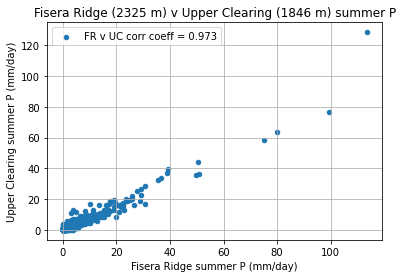

In [28]:
FRUCcorr = summerP_df["FR_summer_p_mm"].corr(summerP_df["UC_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='FR_summer_p_mm', y='UC_summer_p_mm', c='tab:blue',
                               title="Fisera Ridge (2325 m) v Upper Clearing (1846 m) summer P",
                               label="FR v UC corr coeff = 0.973")
plt.grid()
plt.xlabel("Fisera Ridge summer P (mm/day)")
plt.ylabel("Upper Clearing summer P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\FRUC_summer_05-16.png')
FRUCcorr

### Pair 2: Fisera Ridge (2325 m) & Hay Meadow (1436 m)

0.927

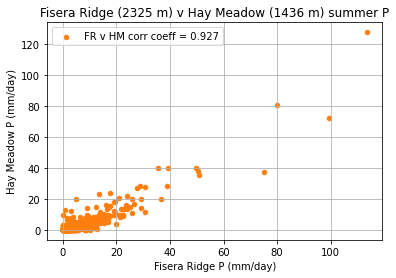

In [29]:
FRHMcorr = summerP_df["FR_summer_p_mm"].corr(summerP_df["HM_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='FR_summer_p_mm', y='HM_summer_p_mm', c='tab:orange',
                               title="Fisera Ridge (2325 m) v Hay Meadow (1436 m) summer P",
                               label="FR v HM corr coeff = 0.927")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/day)")
plt.ylabel("Hay Meadow P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\FRHM_summer_05-16.png')
FRHMcorr

### Pair 3: Fisera Ridge (2325 m) & Kananaskis (1391 m)

0.617

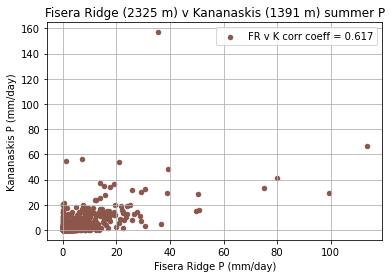

In [30]:
FRKcorr = summerP_df["FR_summer_p_mm"].corr(summerP_df["K_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='FR_summer_p_mm', y='K_summer_p_mm', c='tab:brown',
                               title="Fisera Ridge (2325 m) v Kananaskis (1391 m) summer P",
                               label="FR v K corr coeff = 0.617")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/day)")
plt.ylabel("Kananaskis P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\FRK_summer_05-16.png')
FRKcorr

### Pair 4: Fisera Ridge (2325 m) & Bow Valley (1298 m)

0.842

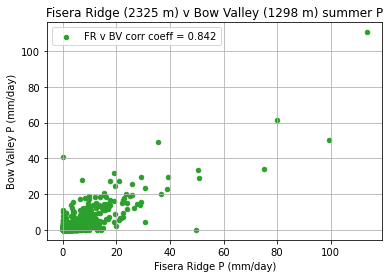

In [31]:
FRBVcorr = summerP_df["FR_summer_p_mm"].corr(summerP_df["BV_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='FR_summer_p_mm', y='BV_summer_p_mm', c='tab:green',
                               title="Fisera Ridge (2325 m) v Bow Valley (1298 m) summer P",
                               label="FR v BV corr coeff = 0.842")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/day)")
plt.ylabel("Bow Valley P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\FRBV_summer_05-16.png')
FRBVcorr

### Pair 5: Fisera Ridge (2325 m) & Kananaskis Pocaterra (1610 m)

0.491

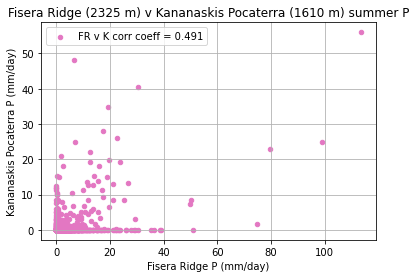

In [32]:
FRKPcorr = summerP_df["FR_summer_p_mm"].corr(summerP_df["KP_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='FR_summer_p_mm', y='KP_summer_p_mm', c='tab:pink',
                               title="Fisera Ridge (2325 m) v Kananaskis Pocaterra (1610 m) summer P",
                               label="FR v K corr coeff = 0.491")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/day)")
plt.ylabel("Kananaskis Pocaterra P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\FRKP_summer_2005-16.png')
FRKPcorr

### Pair 6: Fisera Ridge (2325 m) & Banff CS (1397 m)

0.776

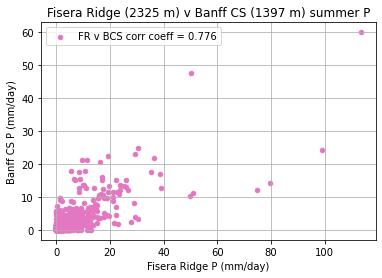

In [33]:
FRBCScorr = summerP_df["FR_summer_p_mm"].corr(summerP_df["BCS_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='FR_summer_p_mm', y='BCS_summer_p_mm', c='tab:pink',
                               title="Fisera Ridge (2325 m) v Banff CS (1397 m) summer P",
                               label="FR v BCS corr coeff = 0.776")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/day)")
plt.ylabel("Banff CS P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\FRBCS_summer_05-16.png')
FRBCScorr

### Pair 7: Fisera Ridge (2325 m) & Wildcat Hills (1268 m)

0.56

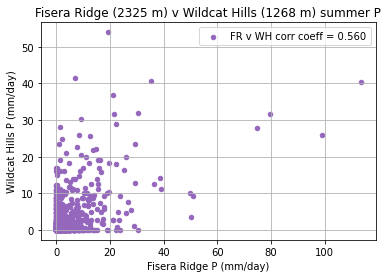

In [34]:
FRWHcorr = summerP_df["FR_summer_p_mm"].corr(summerP_df["WH_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='FR_summer_p_mm', y='WH_summer_p_mm', c='tab:purple',
                               title="Fisera Ridge (2325 m) v Wildcat Hills (1268 m) summer P",
                               label="FR v WH corr coeff = 0.560")
plt.grid()
plt.xlabel("Fisera Ridge P (mm/day)")
plt.ylabel("Wildcat Hills P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\FRWH_summer_05-16.png')
FRWHcorr

### Pair 8: Upper Clearing (1845 m) & Hay Meadow (1436 m)

0.962

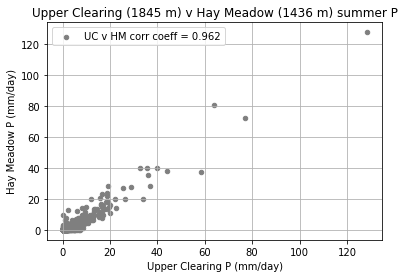

In [35]:
UCHMcorr = summerP_df["UC_summer_p_mm"].corr(summerP_df["HM_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='UC_summer_p_mm', y='HM_summer_p_mm', c='tab:gray',
                               title="Upper Clearing (1845 m) v Hay Meadow (1436 m) summer P",
                               label="UC v HM corr coeff = 0.962")
plt.grid()
plt.xlabel("Upper Clearing P (mm/day)")
plt.ylabel("Hay Meadow P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\UCHM_summer_05-16.png')
UCHMcorr

### Pair 9: Upper Clearing (1845 m) & Kananaskis (1391 m)

0.631

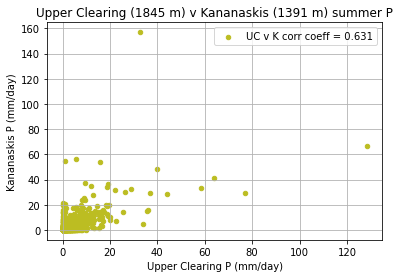

In [36]:
UCKcorr = summerP_df["UC_summer_p_mm"].corr(summerP_df["K_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='UC_summer_p_mm', y='K_summer_p_mm', c='tab:olive',
                               title="Upper Clearing (1845 m) v Kananaskis (1391 m) summer P",
                               label="UC v K corr coeff = 0.631")
plt.grid()
plt.xlabel("Upper Clearing P (mm/day)")
plt.ylabel("Kananaskis P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\UCK_summer_05-16.png')
UCKcorr

### Pair 10: Upper Clearing (1845 m) & Bow Valley (1298 m)

0.873

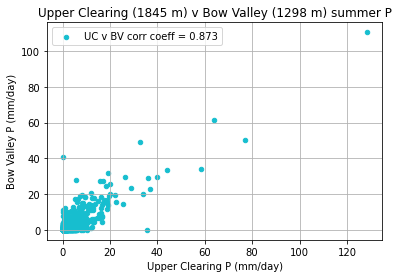

In [37]:
UCBVcorr = summerP_df["UC_summer_p_mm"].corr(summerP_df["BV_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='UC_summer_p_mm', y='BV_summer_p_mm', c='tab:cyan',
                               title="Upper Clearing (1845 m) v Bow Valley (1298 m) summer P",
                               label="UC v BV corr coeff = 0.873")
plt.grid()
plt.xlabel("Upper Clearing P (mm/day)")
plt.ylabel("Bow Valley P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\UCBV_summer_05-16.png')
UCBVcorr

### Pair 11: Upper Clearing (1845 m) & Kananaskis Pocaterra (1610 m)

0.517

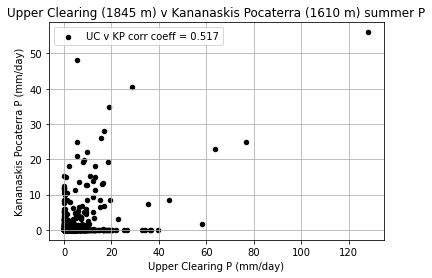

In [38]:
UCKPcorr = summerP_df["UC_summer_p_mm"].corr(summerP_df["KP_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='UC_summer_p_mm', y='KP_summer_p_mm', c='black',
                               title="Upper Clearing (1845 m) v Kananaskis Pocaterra (1610 m) summer P",
                               label="UC v KP corr coeff = 0.517")
plt.grid()
plt.xlabel("Upper Clearing P (mm/day)")
plt.ylabel("Kananaskis Pocaterra P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\UCKP_summer_05-16.png')
UCKPcorr

### Pair 12: Upper Clearing (1845 m) & Banff CS (1397 m)

0.794

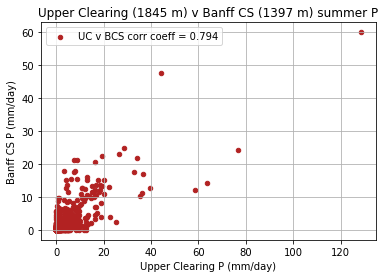

In [39]:
UCBCScorr = summerP_df["UC_summer_p_mm"].corr(summerP_df["BCS_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='UC_summer_p_mm', y='BCS_summer_p_mm', c='firebrick',
                               title="Upper Clearing (1845 m) v Banff CS (1397 m) summer P",
                               label="UC v BCS corr coeff = 0.794")
plt.grid()
plt.xlabel("Upper Clearing P (mm/day)")
plt.ylabel("Banff CS P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\UCBCS_summer_05-16.png')
UCBCScorr

### Pair 13: Upper Clearing (1845 m) & Wildcat Hills (1268 m)

0.558

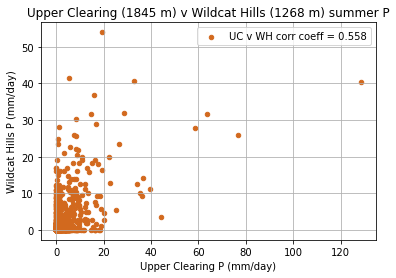

In [40]:
UCWHcorr = summerP_df["UC_summer_p_mm"].corr(summerP_df["WH_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='UC_summer_p_mm', y='WH_summer_p_mm', c='chocolate',
                               title="Upper Clearing (1845 m) v Wildcat Hills (1268 m) summer P",
                               label="UC v WH corr coeff = 0.558")
plt.grid()
plt.xlabel("Upper Clearing P (mm/day)")
plt.ylabel("Wildcat Hills P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\UCWH_summer_05-16.png')
UCWHcorr

### Pair 14: Hay Meadow (1436 m) & Kananaskis (1391 m)

0.638

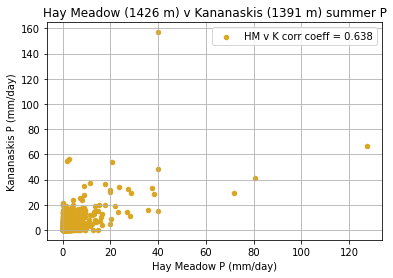

In [41]:
HMKcorr = summerP_df["HM_summer_p_mm"].corr(summerP_df["K_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='HM_summer_p_mm', y='K_summer_p_mm', c='goldenrod',
                               title="Hay Meadow (1426 m) v Kananaskis (1391 m) summer P",
                               label="HM v K corr coeff = 0.638")
plt.grid()
plt.xlabel("Hay Meadow P (mm/day)")
plt.ylabel("Kananaskis P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\HMK_summer_05-16.png')
HMKcorr

### Pair 15: Hay Meadow (1436 m) & Bow Valley (1298 m)

0.859

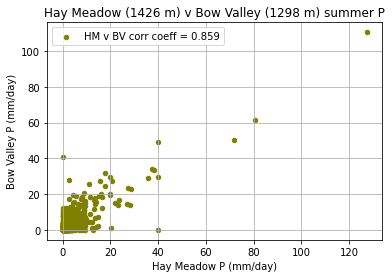

In [42]:
HMBVcorr = summerP_df["HM_summer_p_mm"].corr(summerP_df["BV_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='HM_summer_p_mm', y='BV_summer_p_mm', c='olive',
                               title="Hay Meadow (1426 m) v Bow Valley (1298 m) summer P",
                               label="HM v BV corr coeff = 0.859")
plt.grid()
plt.xlabel("Hay Meadow P (mm/day)")
plt.ylabel("Bow Valley P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\HMBV_summer_05-16.png')
HMBVcorr

### Pair 16: Hay Meadow (1436 m) & Kananaskis Pocaterra (1610 m)

0.525

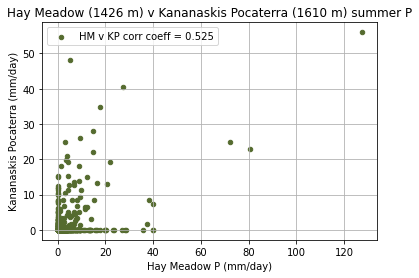

In [43]:
HMKPcorr = summerP_df["HM_summer_p_mm"].corr(summerP_df["KP_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='HM_summer_p_mm', y='KP_summer_p_mm', c='darkolivegreen',
                               title="Hay Meadow (1426 m) v Kananaskis Pocaterra (1610 m) summer P",
                               label="HM v KP corr coeff = 0.525")
plt.grid()
plt.xlabel("Hay Meadow P (mm/day)")
plt.ylabel("Kananaskis Pocaterra (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\HMKP_summer_05-16.png')
HMKPcorr

### Pair 17: Hay Meadow (1436 m) & Banff CS (1397 m)

0.736

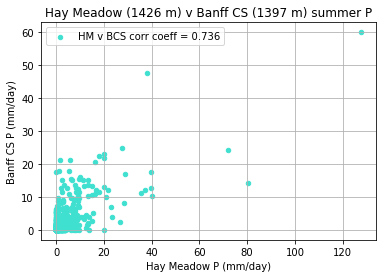

In [44]:
HMBCScorr = summerP_df["HM_summer_p_mm"].corr(summerP_df["BCS_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='HM_summer_p_mm', y='BCS_summer_p_mm', c='turquoise',
                               title="Hay Meadow (1426 m) v Banff CS (1397 m) summer P",
                               label="HM v BCS corr coeff = 0.736")
plt.grid()
plt.xlabel("Hay Meadow P (mm/day)")
plt.ylabel("Banff CS P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\HMBCS_summer_05-16.png')
HMBCScorr

### Pair 18: Hay Meadow (1436 m) & Wildcat Hills (1268 m)

0.532

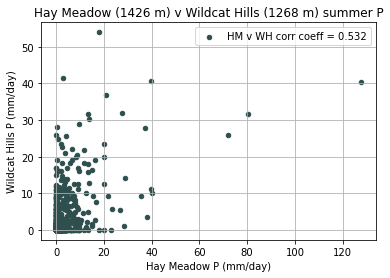

In [45]:
HMWHcorr = summerP_df["HM_summer_p_mm"].corr(summerP_df["WH_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='HM_summer_p_mm', y='WH_summer_p_mm', c='darkslategray',
                               title="Hay Meadow (1426 m) v Wildcat Hills (1268 m) summer P",
                               label="HM v WH corr coeff = 0.532")
plt.grid()
plt.xlabel("Hay Meadow P (mm/day)")
plt.ylabel("Wildcat Hills P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\HMWH_summer_05-16.png')
HMWHcorr

### Pair 19: Kananaskis (1391 m) & Bow Valley (1298 m)

0.725

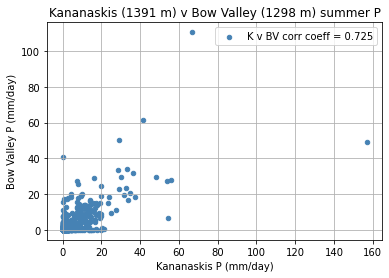

In [46]:
KBVcorr = summerP_df["K_summer_p_mm"].corr(summerP_df["BV_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='K_summer_p_mm', y='BV_summer_p_mm', c='steelblue',
                               title="Kananaskis (1391 m) v Bow Valley (1298 m) summer P",
                               label="K v BV corr coeff = 0.725")
plt.grid()
plt.xlabel("Kananaskis P (mm/day)")
plt.ylabel("Bow Valley P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\KBV_summer_05-16.png')
KBVcorr

### Pair 20: Kananaskis (1391 m) & Kananaskis Pocaterra (1610 m)

0.384

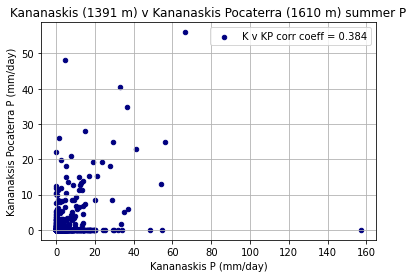

In [47]:
KKPcorr = summerP_df["K_summer_p_mm"].corr(summerP_df["KP_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='K_summer_p_mm', y='KP_summer_p_mm', c='navy',
                               title="Kananaskis (1391 m) v Kananaskis Pocaterra (1610 m) summer P",
                               label="K v KP corr coeff = 0.384")
plt.grid()
plt.xlabel("Kananaskis P (mm/day)")
plt.ylabel("Kananaksis Pocaterra P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\KKP_summer_05-16.png')
KKPcorr

### Pair 21: Kananaskis (1391 m) & Banff CS (1397 m)

0.575

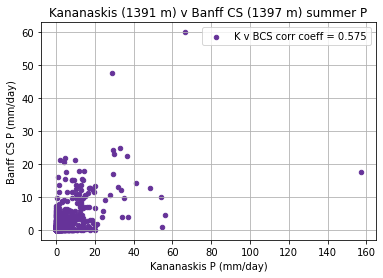

In [48]:
KBCScorr = summerP_df["K_summer_p_mm"].corr(summerP_df["BCS_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='K_summer_p_mm', y='BCS_summer_p_mm', c='rebeccapurple',
                               title="Kananaskis (1391 m) v Banff CS (1397 m) summer P",
                               label="K v BCS corr coeff = 0.575")
plt.grid()
plt.xlabel("Kananaskis P (mm/day)")
plt.ylabel("Banff CS P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\KBCS_summer_05-16.png')
KBCScorr

### Pair 22: Kananaskis (1391 m) & Wildcat Hills (1268 m)

0.692

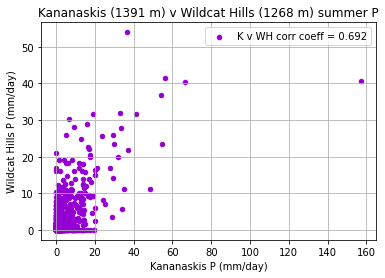

In [49]:
KWHcorr = summerP_df["K_summer_p_mm"].corr(summerP_df["WH_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='K_summer_p_mm', y='WH_summer_p_mm', c='darkviolet',
                               title="Kananaskis (1391 m) v Wildcat Hills (1268 m) summer P",
                               label="K v WH corr coeff = 0.692")
plt.grid()
plt.xlabel("Kananaskis P (mm/day)")
plt.ylabel("Wildcat Hills P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\KWH_summer_05-16.png')
KWHcorr

### Pair 23: Bow Valley (1298 m) & Kananaskis Pocaterra (1610 m)

0.479

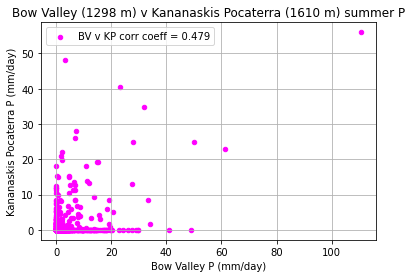

In [50]:
BVKPcorr = summerP_df["BV_summer_p_mm"].corr(summerP_df["KP_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='BV_summer_p_mm', y='KP_summer_p_mm', c='fuchsia',
                               title="Bow Valley (1298 m) v Kananaskis Pocaterra (1610 m) summer P",
                               label="BV v KP corr coeff = 0.479")
plt.grid()
plt.xlabel("Bow Valley P (mm/day)")
plt.ylabel("Kananaskis Pocaterra P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\BVKP_summer_05-16.png')
BVKPcorr

### Pair 24: Bow Valley (1298 m) & Banff CS (1397 m)

0.756

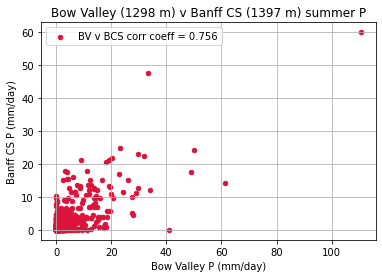

In [51]:
BVBCScorr = summerP_df["BV_summer_p_mm"].corr(summerP_df["BCS_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='BV_summer_p_mm', y='BCS_summer_p_mm', c='crimson',
                               title="Bow Valley (1298 m) v Banff CS (1397 m) summer P",
                               label="BV v BCS corr coeff = 0.756")
plt.grid()
plt.xlabel("Bow Valley P (mm/day)")
plt.ylabel("Banff CS P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\BVBCS_summer_05-16.png')
BVBCScorr

### Pair 25: Bow Valley (1298 m) & Wildcat Hills (1268 m)

0.61

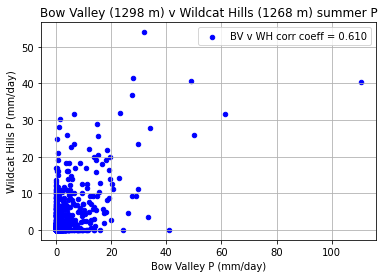

In [52]:
BVWHcorr = summerP_df["BV_summer_p_mm"].corr(summerP_df["WH_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='BV_summer_p_mm', y='WH_summer_p_mm', c='b',
                               title="Bow Valley (1298 m) v Wildcat Hills (1268 m) summer P",
                               label="BV v WH corr coeff = 0.610")
plt.grid()
plt.xlabel("Bow Valley P (mm/day)")
plt.ylabel("Wildcat Hills P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\BVWH_summer_05-16.png')
BVWHcorr

### Pair 26: Kananaskis Pocaterra (1610 m) & Banff CS (1397 m)

0.472

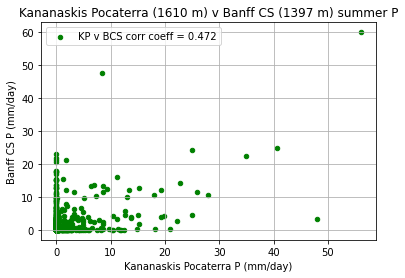

In [53]:
KPBCScorr = summerP_df["KP_summer_p_mm"].corr(summerP_df["BCS_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='KP_summer_p_mm', y='BCS_summer_p_mm', c='g',
                               title="Kananaskis Pocaterra (1610 m) v Banff CS (1397 m) summer P",
                               label="KP v BCS corr coeff = 0.472")
plt.grid()
plt.xlabel("Kananaskis Pocaterra P (mm/day)")
plt.ylabel("Banff CS P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\KPBCS_summer_05-16.png')
KPBCScorr

### Pair 27: Kananskis Pocaterra (1610 m) & Wildcat Hills (1268 m)

0.442

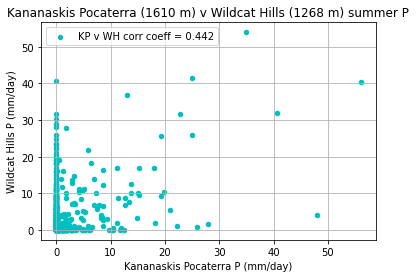

In [54]:
KPWHcorr = summerP_df["KP_summer_p_mm"].corr(summerP_df["WH_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='KP_summer_p_mm', y='WH_summer_p_mm', c='c',
                               title="Kananaskis Pocaterra (1610 m) v Wildcat Hills (1268 m) summer P",
                               label="KP v WH corr coeff = 0.442")
plt.grid()
plt.xlabel("Kananaskis Pocaterra P (mm/day)")
plt.ylabel("Wildcat Hills P (mm/day)")
# plt.xlim(0, 70)
# plt.ylim(0, 70)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\KPWH_summer_05-16.png')
KPWHcorr

### Pair 28: Banff CS (1397 m) & Wildcat Hills (1268 m)

0.528

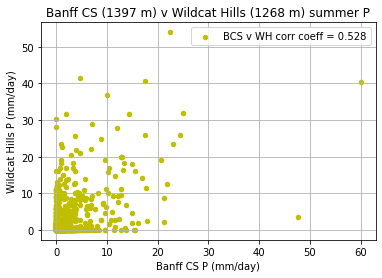

In [55]:
BCSWHcorr = summerP_df["BCS_summer_p_mm"].corr(summerP_df["WH_summer_p_mm"]).round(3)
summerP_df.plot.scatter(x='BCS_summer_p_mm', y='WH_summer_p_mm', c='y',
                               title="Banff CS (1397 m) v Wildcat Hills (1268 m) summer P",
                               label="BCS v WH corr coeff = 0.528")
plt.grid()
plt.xlabel("Banff CS P (mm/day)")
plt.ylabel("Wildcat Hills P (mm/day)")
# plt.xlim(0, 180)
# plt.ylim(0, 180)
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\BCSWH_summer_05-16.png')
BCSWHcorr

### Print all 28 correlation values

In [56]:
print("Fisera Ridge Upper Clearing correlation =", FRUCcorr.round(3))
print("Fisera Ridge Hay Meadow correlation =", FRHMcorr.round(3))
print("Fisera Ridge Kananaskis correlation =", FRKcorr.round(3))
print("Fisera Ridge Bow Valley correlation =", FRBVcorr.round(3))
print("Fisera Ridge Kananaskis Pocaterra correlation =", FRKPcorr.round(3))
print("Fisera Ridge Banff CS correlation =", FRBCScorr.round(3))
print("Fisera Ridge Wildcat Hills correlation =", FRWHcorr.round(3))
print("Upper Clearing Hay Meadow correlation =", UCHMcorr.round(3))
print("Upper Clearing Kananaskis correlation =", UCKcorr.round(3))
print("Upper Clearing Bow Valley correlation =", UCBVcorr.round(3))
print("Upper Clearing Kananaskis Pocaterra correlation =", UCKPcorr.round(3))
print("Upper Clearing Banff CS correlation =", UCBCScorr.round(3))
print("Upper Clearing Wildcat Hills correlation =", UCWHcorr.round(3))
print("Hay Meadow Kananaskis correlation =", HMKcorr.round(3))
print("Hay Meadow Bow Valley correlation =", HMBVcorr.round(3))
print("Hay Meadow Kananaskis Pocaterra correlation =", HMKPcorr.round(3))
print("Hay Meadow Banff CS correlation =", HMBCScorr.round(3))
print("Hay Meadow Wildcat Hills correlation =", HMWHcorr.round(3))
print("Kananaskis Bow Valley correlation =", KBVcorr.round(3))
print("Kananaskis Kananaskis Pocaterra correlation =", KKPcorr.round(3))
print("Kananaskis Banff CS correlation =", KBCScorr.round(3))
print("Kananaskis Wildcat Hills correlation =", KWHcorr.round(3))
print("Bow Valley Kananaskis Pocaterra correlation =", BVKPcorr.round(3))
print("Bow Valley Banff CS correlation =", BVBCScorr.round(3))
print("Bow Valley Wildcat Hills correlation =", BVWHcorr.round(3))
print("Kananaskis Pocaterra Banff CS correlation =", KPBCScorr.round(3))
print("Kananaskis Pocaterra Wildcat Hills correlation =", KPWHcorr.round(3))
print("Banff CS Wildcat Hills correlation =", BCSWHcorr.round(3))

Fisera Ridge Upper Clearing correlation = 0.973
Fisera Ridge Hay Meadow correlation = 0.927
Fisera Ridge Kananaskis correlation = 0.617
Fisera Ridge Bow Valley correlation = 0.842
Fisera Ridge Kananaskis Pocaterra correlation = 0.491
Fisera Ridge Banff CS correlation = 0.776
Fisera Ridge Wildcat Hills correlation = 0.56
Upper Clearing Hay Meadow correlation = 0.962
Upper Clearing Kananaskis correlation = 0.631
Upper Clearing Bow Valley correlation = 0.873
Upper Clearing Kananaskis Pocaterra correlation = 0.517
Upper Clearing Banff CS correlation = 0.794
Upper Clearing Wildcat Hills correlation = 0.558
Hay Meadow Kananaskis correlation = 0.638
Hay Meadow Bow Valley correlation = 0.859
Hay Meadow Kananaskis Pocaterra correlation = 0.525
Hay Meadow Banff CS correlation = 0.736
Hay Meadow Wildcat Hills correlation = 0.532
Kananaskis Bow Valley correlation = 0.725
Kananaskis Kananaskis Pocaterra correlation = 0.384
Kananaskis Banff CS correlation = 0.575
Kananaskis Wildcat Hills correlation

### Sort station pairs by descending order of correlation coefficient
### Also add in distance (m) between each gauge pair

In [57]:
# step 1: initialise my lists
corrsummer = [["FRUC", FRUCcorr.round(3), 2020], ["FRHM", FRHMcorr.round(3), 4770], ["FRK", FRKcorr.round(3), 14310], 
        ["FRBV", FRBVcorr.round(3), 17140], ["FRKP", FRKPcorr.round(3), 27730], ["FRBCS", FRBCScorr.round(3), 44750],
        ["FRWH", FRWHcorr.round(3), 48580],
        ["UCHM", UCHMcorr.round(3), 2910], ["UCK", UCKcorr.round(3), 12650], ["UCBV", UCBVcorr.round(3), 16040],
        ["UCKP", UCKPcorr.round(3), 27420], ["UCBCS", UCBCScorr.round(3), 45830], ["UCWH", UCWHcorr.round(3), 47160],
        ["HMK", HMKcorr.round(3), 36890], ["HMBV", HMBVcorr.round(3), 16300], ["HMKP", HMKPcorr.round(3), 25800],
        ["HMBCS", HMBCScorr.round(3), 48450], ["HMWH", HMWHcorr.round(3), 46540],
        ["KBV", KBVcorr.round(3), 6600], ["KKP", KKPcorr.round(3), 35550],
        ["KBCS", KBCScorr.round(3), 46750], ["KWH", KWHcorr.round(3), 34730],
        ["BVKP", BVKPcorr.round(3), 41420], ["BVBCS", BVBCScorr.round(3), 41210], ["BVWH", BVWHcorr.round(3), 31830],
        ["KPBCS", KPBCScorr.round(3), 71390], ["KPWH", KPWHcorr.round(3), 67980],
        ["BCSWH", BCSWHcorr.round(3), 58090]]

# corrsummer

In [58]:
# step 2: create df from lists
corrsummer_df = pd.DataFrame(corrsummer, columns = ["station_pair", "corr_coeff", "separation_distance_m"])
# corrsummer_df.set_index("station_pair", inplace=True)
# corrsummer_df

In [59]:
# sort by descending order of corr coeff
corrsummer_df.sort_values(by=['corr_coeff'], inplace=True, ascending=False)
corrsummer_df
# write to csv
corrsummer_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\summer_table_05-16.csv", index=False)

### Correlation by separation distance: plot correlations above against distance between gauge pairs to give us an upside-down spatial variogram

In [60]:
# sort by separation distance
corrsummer_df.sort_values(by=['separation_distance_m'], inplace=True, ascending=True)
corrsummer_df

,station_pair,corr_coeff,separation_distance_m
0,FRUC,0.973,2020
7,UCHM,0.962,2910
1,FRHM,0.927,4770
18,KBV,0.725,6600
8,UCK,0.631,12650
2,FRK,0.617,14310
9,UCBV,0.873,16040
14,HMBV,0.859,16300
3,FRBV,0.842,17140
15,HMKP,0.525,25800


### Scatter plot separation distance v corr coeff

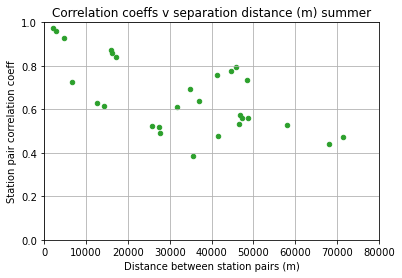

In [61]:
corrsummer_df.plot.scatter(x='separation_distance_m', y='corr_coeff', c='tab:green',
                               title="Correlation coeffs v separation distance (m) summer")
plt.grid()
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 80000)
plt.ylim(0, 1.0)
# plt.show
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\distcorr_summer.png')

### Focus on separation distances of up to 20,000 m

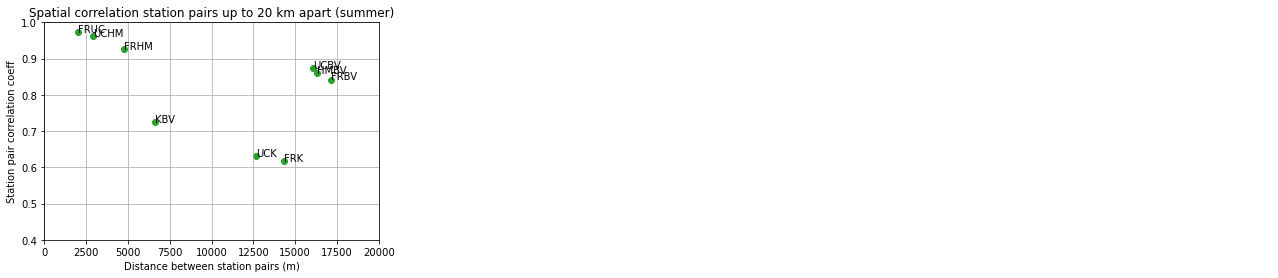

In [63]:
x = corrsummer_df.separation_distance_m
y = corrsummer_df.corr_coeff

# # polynomial fit with degree = 2
# model = np.poly1d(np.polyfit(x, y, 2))
# # add fitted polynomial line to scatterplot
# polyline = np.linspace(1, 80000, 1000)

plt.scatter(x, y, c="tab:green")
# plt.plot(polyline, model(polyline))
plt.grid()
plt.title("Spatial correlation station pairs up to 20 km apart (summer)")
plt.xlabel("Distance between station pairs (m)")
plt.ylabel("Station pair correlation coeff")
plt.xlim(0, 20000)
plt.ylim(0.4, 1.0)
# plot labels on points
for i, txt in enumerate(corrsummer_df.station_pair):
    plt.annotate(txt, (corrsummer_df.separation_distance_m.iat[i], corrsummer_df.corr_coeff.iat[i]))
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\seasonal_plots\summer\distcorr_summer20km.png')